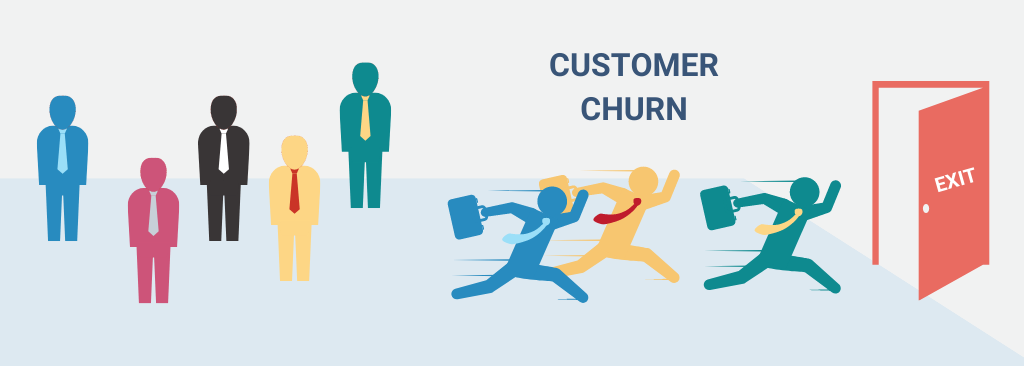
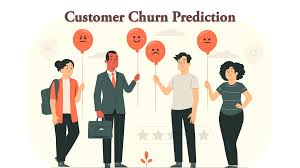
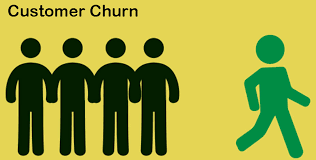

# **Import Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# **Load the Dataset**

In [ ]:
df =pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")
df.head()

# **Data Analysis:**

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.count()

# **Data Preprocessing and Cleaning:**

**Remove Duplicate Values**

In [ ]:
duplicate=df[df.duplicated()]
print(duplicate)

In [ ]:
df = df.drop_duplicates()
df.head()

**Handling Missing Values**

In [ ]:
df.isnull().sum()

**Drop Unnecessary Columns**

In [ ]:
#Drop name and ticket Columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape

**Outlier Detection**

In [ ]:
sns.boxplot(x=df['Age'])

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age after Outlier Removal and Scaling")
plt.show()

In [ ]:
sns.boxplot(x=df['CreditScore'])

In [ ]:
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['CreditScore'] >= lower_bound) & (df['CreditScore'] <= upper_bound)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['CreditScore'] = scaler.fit_transform(df[['CreditScore']])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['CreditScore'])
plt.title("Boxplot of Age after Outlier Removal and Scaling")
plt.show()

In [ ]:
sns.boxplot(x=df['Tenure'])

In [ ]:
sns.boxplot(x=df['Balance'])


In [ ]:
sns.boxplot(x=df['NumOfProducts'])

In [ ]:
sns.boxplot(x=df['EstimatedSalary'])


In [ ]:
df['Exited'].value_counts() # Checking for the counts for 0 and 1 in the target column which we want to predict
                                # We do this to check that the dataset is imbalanced or not and if it is then we try to manage it by using certain techniques
                                # or by manually manipulating the data

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Geography'] #0 for france , 1 for  , 2 for spain
le = LabelEncoder()
df[label_cols] = df[label_cols].apply(lambda col: le.fit_transform(col))

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Gender'] #0 for female , 1 for male
le = LabelEncoder()
df[label_cols] = df[label_cols].apply(lambda col: le.fit_transform(col))

In [ ]:
df.head()

# **Data Visualization:**

**Churm distribution with respect to Gender**

In [ ]:
# Survival by Gender
# most of the MALE had Died.
# Most of the FEMALE had Survived.
sns.countplot(data=df,x="Gender",hue="Exited",palette="Set1") # 0=Female , 1=Male
plt.title("Churm distribution with respect to Gender")
plt.show()

**Churm distribution with respect to Tenure**

In [ ]:
import matplotlib.pyplot as pit
import seaborn as sns

# Create figure and axis
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title("Churn distribution with respect to Tenure")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.legend(labels= ["Exited", "not exited"])
plt.show()

**Churm distribution with respect to Age**

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Age", hue="Exited", fill=True, common_norm=False, alpha=0.5)
plt.title("Churm distribution with respect to Age")
plt.xlabel("Age")
plt.show()

# **Train-Test Split:**

In [ ]:
x=df.drop('Exited', axis=1)
y=df['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=400)

# **Machine Learning Model Evaluations and Predictions**

> **KNN:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)

In [ ]:
print(classification_report(y_test, predicted_y))


In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("K-Neighbors Classifier CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
import joblib

joblib.dump(knn_model, "knn_model.pkl")

> **SVC**

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
predict_y = svc_model.predict(x_test)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

In [ ]:
print(classification_report(y_test, predict_y))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" SVC CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
import joblib

joblib.dump(svc_model, "svc_model.pkl")

> **Random Forest**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model =RandomForestClassifier (random_state = 1)
rf_model.fit(x_train,y_train)
rf_predict_y = rf_model.predict(x_test)
accuracy_svc = rf_model.score(x_test,y_test)
print("Random Forest accuracy is :",accuracy_svc)

In [ ]:
print(classification_report(y_test, rf_predict_y))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Random Forest CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
import joblib

joblib.dump(rf_model, "rf_model.pkl")

> **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model =DecisionTreeClassifier (random_state = 1)
dt_model.fit(x_train,y_train)
dt_predict_y = rf_model.predict(x_test)
accuracy_svc = rf_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_svc)

In [ ]:
print(classification_report(y_test, dt_predict_y))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Decision Tree CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
import joblib

joblib.dump(dt_model, "dt_model.pkl")

> **Logistic Regression**

In [ ]:

lr_model =LogisticRegression(random_state = 1)
lr_model.fit(x_train,y_train)
lr_predict_y = rf_model.predict(x_test)
accuracy_svc = rf_model.score(x_test,y_test)
print("Logistic Regression  accuracy is :",accuracy_svc)

In [ ]:
print(classification_report(y_test, lr_predict_y))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
import joblib

joblib.dump(lr_model, "lr_model.pkl")

# **Prediction on New data:**

In [ ]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [ ]:
import joblib
import pandas as pd

# ====== Step 1: Model Options ======
model_files = {
    "1": ("SVC", "/kaggle/working/svc_model.pkl"),
    "2": ("Logistic Regression", "/kaggle/working/lr_model.pkl"),
    "3": ("KNN", "/kaggle/working/knn_model.pkl"),
    "4": ("Decision Tree", "/kaggle/working/dt_model.pkl"),
    "5": ("Random Forest", "/kaggle/working/rf_model.pkl")
}

print("Choose a model to predict customer churn:")
for key, (name, _) in model_files.items():
    print(f"{key}. {name}")

choice = input("Enter the number of the model you want to use: ").strip()
if choice not in model_files:
    print("❌ Invalid choice. Exiting...")
    exit()

model_name, model_file = model_files[choice]

# ====== Step 2: Load Model ======
model = joblib.load(model_file)
print(f"\n✅ Loaded model: {model_name}")

# ====== Step 3: Loop for multiple predictions ======
while True:
    print("\nEnter new customer data (numerical format as per encoding):")
    try:
        data = {
            'CreditScore': float(input("CreditScore: ")),
            'Geography': int(input("Geography (0=France, 1=Germany, 2=Spain): ")),
            'Gender': int(input("Gender (0=Female, 1=Male): ")),
            'Age': float(input("Age: ")),
            'Tenure': float(input("Tenure: ")),
            'Balance': float(input("Balance: ")),
            'NumOfProducts': float(input("NumOfProducts: ")),
            'HasCrCard': float(input("HasCrCard (1=Yes, 0=No): ")),
            'IsActiveMember': float(input("IsActiveMember (1=Yes, 0=No): ")),
            'EstimatedSalary': float(input("EstimatedSalary: "))
        }
    except ValueError:
        print("❌ Invalid input. Please enter numeric values.")
        continue

    # ====== Step 4: Convert to DataFrame ======
    input_df = pd.DataFrame([data])

    # ====== Step 5: Predict ======
    prediction = model.predict(input_df)
    result = "Customer Will Churn" if prediction[0] == 1 else "Customer Will Stay"

    print(f"\n🔍 Prediction Result: {result}")

    # ====== Step 6: Ask to Continue ======
    again = input("\nDo you want to predict another customer? (yes/no): ").strip().lower()
    if again not in ['yes', 'y']:
        print("\n👋 Goodbye!")
        break
